In [51]:
import pandas as pd

In [52]:
bostonDF = pd.read_csv('./data/Boston_house.csv')

In [53]:
bostonDF.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [54]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [55]:
bostonDF.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [56]:
bostonDF.isnull().sum()

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

In [57]:
bostonDF['RAD'].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [58]:
bostonDF['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [59]:
bostonDF['DIS'].value_counts()

DIS
3.4952    5
5.7209    4
5.2873    4
6.8147    4
5.4007    4
         ..
2.4220    1
2.1620    1
2.0407    1
1.9709    1
2.5050    1
Name: count, Length: 412, dtype: int64

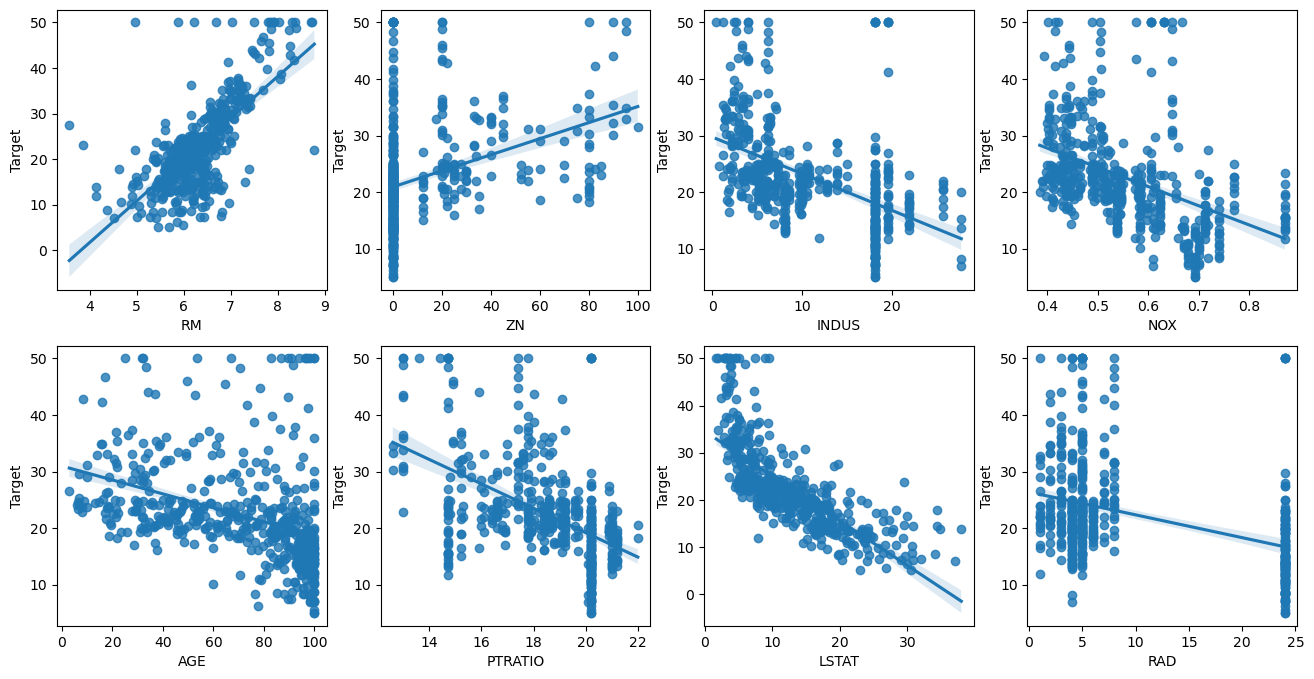

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)

lm_features = ["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD"]

for i , feature in enumerate(lm_features):
    row= int(i/4) # row 2개 만들기 위한 계산식
    col= i%4      # col 4개 만들기 위한 계산식
    sns.regplot(x=feature,y="Target",data=bostonDF,ax=axs[row][col])
    
    # rm과 lstat가 가장 큰 영향을 미침

In [64]:
# 선형 회귀
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



#X,y나누기
X = bostonDF.drop(['Target'],axis=1,inplace=False)

y = bostonDF["Target"]
# train/test분리

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=156)

lr = LinearRegression()


# 훈련
lr.fit(X_train,y_train)


y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test,y_preds) # mse = 실제값과 예측값의 차이를 제곱하여 평균
rmse = np.sqrt(mse)                      # rmse = mse에 루트를 씌움 (mse는 실제오류평균보다 커지는 특성이 있기 때문)



In [62]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7273505005599823
0.7572263323138937


In [68]:
print('mse : {0:.3f}'.format(mse))

print('mse : {0:.3f}'.format(rmse))


mse : 17.297
mse : 4.159


In [ ]:
print('r2_score : {0:.3f}'.format(r2_score(y_test,y_preds)))

r2_score : 0.757


In [69]:
print('절편 값:',lr.intercept_)
print("회귀 계수값:",np.round(lr.coef_,1))

절편 값: 40.99559517216453
회귀 계수값: [  0.    0.    3.4  -0.1  -1.7   0.   -0.6 -19.8  -0.9   0.4   0.1  -0.
   3. ]


In [71]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X.columns)
coeff.sort_values(ascending=False) 

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
AGE         0.0
B           0.0
INDUS       0.0
TAX        -0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64